# Table of content

1. [Table of content](#Table-of-content)   
2. [Biopython](#Biopython)
3. [Useful websites](#Useful-websites)
4. [XML files](#XML-files)
5. [Biopython Entrez](#Biopython-Entrez)
   1. [ez.einfo() and ez.read()](#ez.einfo()-and-ez.read())
       - [Excursion: read()](#Excursion:-read())
      1. [ez.einfo() without an argument](#ez.einfo()-without-an-argument)
      2. [ez.einfo() with an argument](#ez.einfo()-with-an-argument)
      3. [Finding the search terms available to a particular database](#Finding-the-search-terms-available-to-a-particular-database)
   4. [ez.esearch()](#ez.esearch())
   5. [ez.esummary()](#ez.esummary())
      1. [esummary in the databases Gene and Biosample (and maybe others)](#esummary-in-the-databases-Gene-and-Biosample-(and-maybe-others))
   6. [ez.efetch()](#ez.efetch())
   7. [SeqIO](#SeqIO)
   8. [ez.elink()](#ez.elink())
   9. [ez.egquery()](#ez.egquery())
   10. [Combining Functions](#Combining-Functions)
6. [UniProt](#UniProt)
   1. [ExPASy.get_sprot_raw()](ExPASy.get_sprot_raw())
   2. [SwissProt.read()](#SwissProt.read())
7. [PDB](#PDB)   
8. [Exercises](#Exercises)
    1. [Exercise 6 - Using ez.einfo](#Exercise-6---Using-ez.einfo)
    2. [Exercise 7 - Searching NCBI Databases](#Exercise-7---Searching-NCBI-Databases)
    3. [Exercise 8 - Creating Summaries](#Exercise-8---Creating-Summaries)
    4. [Exercise 9 - Fetching Data](#Exercise-9---Fetching-Data)
    5. [Exercise 10 - Linked data](#Exercise-10---Linked-data)
    6. [Exercise 11 - Global Searches](#Exercise-11---Global-Searches)
    7. [Exercise 12 - A pipeline](#Exercise-12-A-pipeline)

# Biopython

Big collection of tools for biological computation in Python.

- Interacts with common bioinformatics programs
- Also used to read in data from databases (e.g. Entrez, UniPot). Developed in colaboration with scientists from the databases.
- Allows to read many bioinformatics files (e.g. fasta, genbank)
- Can start command line tools like BLAST or Alignment Tools from EMBL (usually started from terminal)
- *Extremely* big module. Never import the whole Biopython but only the submodules you need

# Useful websites

https://biopython.org/DIST/docs/tutorial/Tutorial.html

https://biopython.org/wiki

# XML files

XML = extensible mashup language     
Allows to store data, similar to html files. 

3 elements:

- tags (structure elemetns)
- attributes (additional information added to tags)
- values (our data)

Example Syntax:

    <protein_list>
        <protein>
            <name>RNA-Polymerase</name>
            <weight unit="Da">50473</weight>
        </protein>
    <protein_list>

- `<>` are the opening tags and `</>` are the closing tags. Every opening tag must have a closing tag.
- anything written between `<>` and `</>` is the value, e.g. the name of the protein RNA-Polymerase or its weight
- if the opening tag contains information that the closing tag doesn't have this is an attribute. The syntax for attributes is always `attributename=attributevalue`. Without spaces!! There can be more than one attribute.
- indentation is *not* important as long as the hierachy is correct. it does make readability easier though.

There are many ways to read in xml files. Most often a nested dictionary is the easiest since it allows us to access the tree structure through the keys. Every tag becomse a key. If a tag occurs twice at the same level of the hierachy a list is created

# Biopython Entrez

To use the web services of Biopython in combination with the Entrez NCBI database we use the submodule `Bio.Entrez`

import Syntax

    import Bio.Entrez as ez

At the beginning we always have to hand over an email (for notification in case of downtime). Can be an empty string, but the line has to be there.

    ez.email = ""

The data sent from the server is always is a text file, most often .xlm. The best way to read in Entrez data is the built-in function of Bio.Entrez, but other parsers would work just maybe not as well

## ez.einfo() and ez.read()

### Excursion: read()

read is a function of a text file that simply reads the whole thing

Syntax:

    textfile.read()

Useful in combination with `print` `print(textfile.read())` for *short* textfiles

Unlike `ez.read()` which is a Biopython inbuilt method.

Use `read` when `ez.read` or `SeqIO.read` are not possible

### ez.einfo() without an argument

`einfo` helps to create good search queries. It has 2 purposes

1. to get a,list of available databases (without argument)
2. to get more infromation about a specific database of the NCBI (with the db as argument)

`einfo`requires a `with` statement. Anything inside the `with` statements happens while we are connected to the NCBI servers. Once we are outside of it again (indentation at level of `with`, rather than inside) the connection is closed again

Syntax (not preferred):

    with ez.einfo() as query:
        xml_string = query.read()

However, it is better to use `ez.read`, this creates a dictionary out of the .xml file. Better readability

Syntax (preferred):

    with ez.einfo() as query:
        parse_dict = ez.read(query)

The name (`query`) can be freely chosen, but it is customary to use `query` for searches or `handle` for downloads

Without any arguments `einfo` will return a list of databases available in the NCBI. Note that the names may differ from the website. e.g. GeneBank is nuccore

`ez.read()` always creates a dictionary. One `with` statement only allows to read in a single file. For several queries several `with` statements are necessary. `ez.read` *only works with .xml files!!*

In [1]:
import Bio.Entrez as ez

ez.email = ""

with ez.einfo() as query:
        xml_string = query.read()

print("Output of query.read():")
print(xml_string)

print()
print("##########################################################")
print()

with ez.einfo() as query:
    parse_dict = ez.read(query)

print("Output of ez.read(query):")
print(parse_dict)

Output of query.read():
b'<?xml version="1.0" encoding="UTF-8" ?>\n<!DOCTYPE eInfoResult PUBLIC "-//NLM//DTD einfo 20190110//EN" "https://eutils.ncbi.nlm.nih.gov/eutils/dtd/20190110/einfo.dtd">\n<eInfoResult>\n<DbList>\n\n\t<DbName>pubmed</DbName>\n\t<DbName>protein</DbName>\n\t<DbName>nuccore</DbName>\n\t<DbName>ipg</DbName>\n\t<DbName>nucleotide</DbName>\n\t<DbName>structure</DbName>\n\t<DbName>genome</DbName>\n\t<DbName>annotinfo</DbName>\n\t<DbName>assembly</DbName>\n\t<DbName>bioproject</DbName>\n\t<DbName>biosample</DbName>\n\t<DbName>blastdbinfo</DbName>\n\t<DbName>books</DbName>\n\t<DbName>cdd</DbName>\n\t<DbName>clinvar</DbName>\n\t<DbName>gap</DbName>\n\t<DbName>gapplus</DbName>\n\t<DbName>grasp</DbName>\n\t<DbName>dbvar</DbName>\n\t<DbName>gene</DbName>\n\t<DbName>gds</DbName>\n\t<DbName>geoprofiles</DbName>\n\t<DbName>medgen</DbName>\n\t<DbName>mesh</DbName>\n\t<DbName>nlmcatalog</DbName>\n\t<DbName>omim</DbName>\n\t<DbName>orgtrack</DbName>\n\t<DbName>pmc</DbName>\n\t<DbNa

### ez.einfo() with an argument

To search a specific server we add it as arguments to `einfo`

Syntax to search in PubMed:

    with ez.einfo(db = "pubmed") as query:
        answer_dict = ez.read(query)

The important key combination to see which search terms are available for a particular database, see also example below.

    answer_dict["DbInfo"]["FieldList"]

In [2]:
with ez.einfo(db="pubmed") as query:
    PubMedDict = ez.read(query)

print(PubMedDict)

{'DbInfo': {'DbName': 'pubmed', 'MenuName': 'PubMed', 'Description': 'PubMed bibliographic record', 'DbBuild': 'Build-2024.03.14.07.38', 'Count': '36966824', 'LastUpdate': '2024/03/14 07:38', 'FieldList': [{'Name': 'ALL', 'FullName': 'All Fields', 'Description': 'All terms from all searchable fields', 'TermCount': '', 'IsDate': 'N', 'IsNumerical': 'N', 'SingleToken': 'N', 'Hierarchy': 'N', 'IsHidden': 'N'}, {'Name': 'UID', 'FullName': 'UID', 'Description': 'Unique number assigned to publication', 'TermCount': '', 'IsDate': 'N', 'IsNumerical': 'Y', 'SingleToken': 'Y', 'Hierarchy': 'N', 'IsHidden': 'Y'}, {'Name': 'FILT', 'FullName': 'Filter', 'Description': 'Limits the records', 'TermCount': '', 'IsDate': 'N', 'IsNumerical': 'N', 'SingleToken': 'Y', 'Hierarchy': 'N', 'IsHidden': 'N'}, {'Name': 'TITL', 'FullName': 'Title', 'Description': 'Words in title of publication', 'TermCount': '', 'IsDate': 'N', 'IsNumerical': 'N', 'SingleToken': 'N', 'Hierarchy': 'N', 'IsHidden': 'N'}, {'Name': 'ME

### Finding the search terms available to a particular database

to find search critera I can go deeper into the dictionary created with `ez.einfo` and `ez.read`

Syntax

    with ez.einfo(db="nucleotide") as query:
        PubMedDict = ez.read(query)
    
    for field in PubMedDict["DbInfo"]["FieldList"]:
        print(field["Name"],field["FullName"],field["Description"])

The hierachy of the databases: 

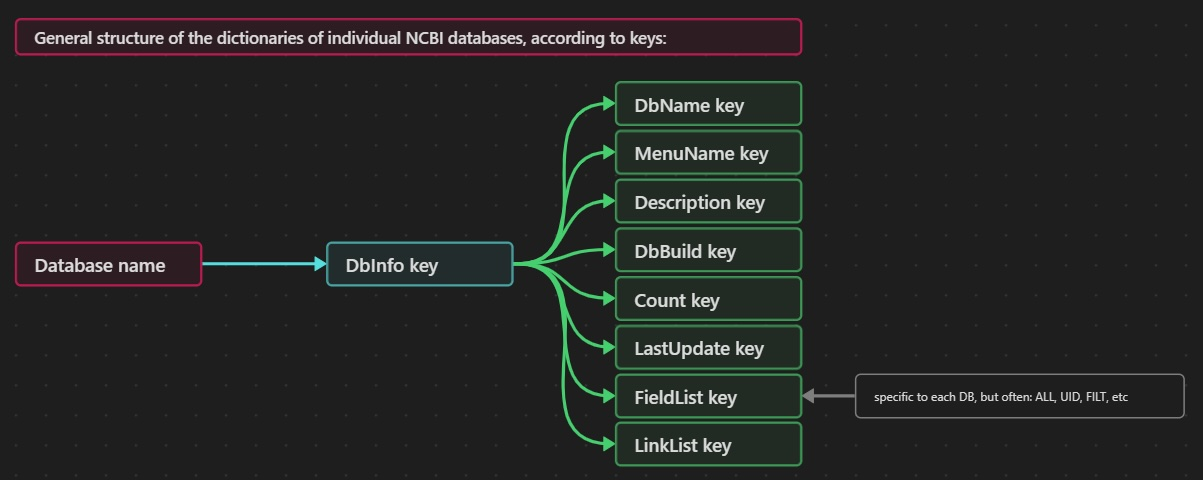

Kudos to Ioana!!

Example:      

The database nucleotide has in a dictionry one key: `DbInfo`       

`DbInfo` has more keys: 'DbName', 'MenuName', 'Description', 'DbBuild', 'Count', 'LastUpdate', 'FieldList', 'LinkList'

`FieldList` are the search terms in a *list* of dictionaries. This is rather troublesome to read, therefore the loop over every element of the list printing only Name, FullName and Decription helps to see what we can actually serach for. To know which keys are available inside the list it is possible to use the Syntax `OuterDict["InnerDict1"]["InnerDict2"][0].keys()` which simply shows the keys of the first elemetn in the list.

In [3]:
with ez.einfo(db="nucleotide") as query:
    NucDict = ez.read(query)
    
print(NucDict.keys())
print(NucDict["DbInfo"].keys())
print(PubMedDict["DbInfo"]["FieldList"][0].keys())
print()
for field in NucDict["DbInfo"]["FieldList"]:
    print(field["Name"],field["FullName"],field["Description"])

dict_keys(['DbInfo'])
dict_keys(['DbName', 'MenuName', 'Description', 'DbBuild', 'Count', 'LastUpdate', 'FieldList', 'LinkList'])
dict_keys(['Name', 'FullName', 'Description', 'TermCount', 'IsDate', 'IsNumerical', 'SingleToken', 'Hierarchy', 'IsHidden'])

ALL All Fields All terms from all searchable fields
UID UID Unique number assigned to each sequence
FILT Filter Limits the records
WORD Text Word Free text associated with record
TITL Title Words in definition line
KYWD Keyword Nonstandardized terms provided by submitter
AUTH Author Author(s) of publication
JOUR Journal Journal abbreviation of publication
VOL Volume Volume number of publication
ISS Issue Issue number of publication
PAGE Page Number Page number(s) of publication
ORGN Organism Scientific and common names of organism, and all higher levels of taxonomy
ACCN Accession Accession number of sequence
PACC Primary Accession Does not include retired secondary accessions
GENE Gene Name Name of gene associated with sequence
PROT P

## ez.esearch()

`esearch` searches through the NCBI databases. 

It takes two arguments, both as strings:

1. `db` (the database to search), only one database at a time
2. `term` (the things we want to look for)
   - one statement but several criteria can be added by logical operators: `AND` `OR` `NOT`    
     - Example: `"Biopython [title] OR Pandas [title]"`
     - The same term can be searched for in several fields connected by `/`
          - `"Biopython [title/abstract]`
         - doesn't work for *all* databases, does work for PubMed
     - Note that `"Two words"` and `' "Two words" '` is not the same!! `"Two words [ALL]"` is interpreted like the latter     
     - If double quotation marks are used it *always* has to be single `'` outside and double `"` inside: `' "a
term" '`
        - otherwise the inner `'`are interpreted as part of the word
   - be aware of *capital letters in logical operators*
   - wildcards (`*`/`?`) work
   - Organisms need to be with the latin name
   - Searches are case insensitice (A/a doesn't matter)

The result is a dictionary containing a list numbers (identifiers) which can later be used to download the data

Syntax

    with ez.esearch(db="pubmed", term = "Biopython[title]") as query:
        record_pub = ez.read(query)

Optional arguments:

- `retmax`: How many identifiers the search returns. Default is 20, maximum is 10,000
- `retstart`: At which index to start returning the identifiers.
   - if > 10,000 results are wanted retmax and retstart have to be combined through multiple searches
- `idtype`: to choose whether identifiers or accession numbers are returned
  - identifiers are specific to a particular database and may exist, though completly unrelated, in other databases. The accession numbers link related content between the databases.
- `sort`: if the results are to be sorted other than the default (varies for the databases)
  check the websites for terms by which the results can be sort. same spelling as website (including spaces) but all lowercase. Careful, if typo occurs it goes to default without notification

The result is always the same dictionary with the following keys:

- `count` the number of hits
- `RetMax`: max number of results saved and displaced. Can be adjusted, but maximum is 10,000
- `RetStart`: which result is the fist one
- `IdList`: List with the identifiers of the resuls.
   - Per default these identifiers are independent between the databases!!
   - Can be changed to accession numbers, which span databases and connects the entries
- `TranslationSet` and `QueryTranslation`: Show how our query was handed over, not of great importance to us, unless we get very unexpected results

If the query is saved we can access the IDs or the Count as keys:

    query_dict["IdList"]
    query_dict["Count"]

In [47]:
with ez.esearch(db="pubmed", term = "Biopython[title]") as query:
    record_pub = ez.read(query)

print(record_pub)
print(record_pub["IdList"])
print(record_pub["Count"])

{'Count': '3', 'RetMax': '3', 'RetStart': '0', 'IdList': ['34434786', '22909249', '19304878'], 'TranslationSet': [], 'QueryTranslation': '"Biopython"[Title]'}
['34434786', '22909249', '19304878']
3


## ez.esummary()

Allows us to pull a short summary of a single entry from a single database   
contains essential information (differs a bit depending on the db)

- author(s)
- title
- publicaition date
- etc.

takes two argument: `db` (which database to look in) and `id` (which entry to look at)    
Since it looks at one entry at a time we need to loop over a list (e.g. the IdList form the search dictionary) for several entries. Optionally the results can be stored in a DataFrame or dictionary. See Christophs example script

Syntax

    # I reproduce the above to have the search term
    with ez.esearch(db="pubmed", term = "Biopython[title]") as query:
        record_pub = ez.read(query)
    
    answer_dict = {} #optional dictionary

    # here come our esummary
    for ids in record_pub["IdList"]:
        with ez.esummary(db = "pubmed", id = ids) as handle:
            record = ez.read(handle)
        print(record)
        
        answer_dict[ids] = record[0]  #optional
         
        #optional more complex print statment to get a better overview
        print("Journal info\nid:",record[0]["Id"],"\nTitle: ",record[0]["Title"])


we take `record[0]` to append to the answer_list/add to answer_dict, since record is a dictionary inside a list `[{}]` , an we don't need the outer list.

`esummary` is often used in combination with if statements to filter for seach terms not available in `esearch`. Especially if saving the results this might make sense


### esummary in the databases Gene and Biosample (and maybe others)

Note that in the database gene, record is directly a dictionary, not a dictionary in a list. 

Information has to be accessed differently:

    record['DocumentSummarySet']['DocumentSummary'][0]

Also the ID is not a value, but an *attribute* of this inner dictionary and has to be accessed through

    record['DocumentSummarySet']['DocumentSummary'][0].attributes["uid"]

## ez.efetch()

After identifying which data to download this is done with `efetch`.

`efetch` takes 4 arguments

- `db`: database
- `id`: id
- `retmode`: datatype returned, e.g. xml, text
- `rettype`: type of data returned, can be left out, e.g. ID List, Abstract
- combinatinos of retmode and rettype possible:
  - https://www.ncbi.nlm.nih.gov/books/NBK25499/table/chapter4.T._valid_values_of__retmode_and/?report=objectonly

Syntax

    with ez.efetch(db = "database", id = "identifier or accession number", retmode = "xml") as handle:
        record1 = ez.read(handle)

remember that `ez.read()` only works for xml files. Other file types need other functions, e.g. 

- `handle.read()` one big string
- `handle.readlines()` a list of strings with each line being one element
- `SeqIO.read(handle, "fasta")` see below

## SeqIO

SeqIO = Sequence Input/Output

- Helps to read in a wide variety of files, e.g. fasta or Genbank data. 
- https://biopython.org/wiki/SeqIO
- generates a SeqRecord object of the Seq class
- (we need to have the data first, so it would first have to be downloaded with efetch if we don't have it already)


Syntax for import

    from Bio import SeqIO

Reading in data (both arguments as strings):

    record1 = SeqIO.read(filename,file type)

For **fasta files** I access the id and sequence through `record1.id` and `record1.seq` respectively

- `record1.seq` creates a Seq object for which we can use sequence methods, e.g. `record1.seq.transcribe()`
   - `transcribe`, `back_transcribe`, `translate` (very rudimentary, optional argument: `to_stop = True`), `complement()`, `reverse_complement()`, `complement_rna()`, `reverse_complement_rna()`



## ez.elink()

Finding links between the databases by using the identifier from one database to find an entry in another database. This does not make use of a shared accession number as really being connected in the background database structure. Crosslinks will not always be found -> this will result in an empty list

All possible crosslinks:     

https://eutils.ncbi.nlm.nih.gov/entrez/query/static/entrezlinks.html

Syntax:

    with ez.elink(db = database_to_search, dbfrom = identifiers_database, id = identifier) as query:
        record = ez.read(query)
        
    print(record[0]['LinkSetDb'][0]['Link'][0]['Id'])

The print statement shows the path to the Link

In [7]:
#showing the link between a protein identifier and the nucleotide database
import Bio.Entrez as ez
ez.email = "christoph-knorr@gmx.de"

protid = "1479555242"
with ez.elink(db="nucleotide",dbfrom="protein",id=protid) as query:
    record = ez.read(query)

print(record)
print()
print(record[0]['LinkSetDb'])
print()
print(record[0]['LinkSetDb'][0]['Link'])
print()
print(record[0]['LinkSetDb'][0]['Link'][0]['Id'])

[{'ERROR': [], 'LinkSetDb': [{'Link': [{'Id': '1479555241'}], 'DbTo': 'nuccore', 'LinkName': 'protein_nuccore'}, {'Link': [{'Id': '1479555241'}], 'DbTo': 'nuccore', 'LinkName': 'protein_nuccore_mrna'}], 'LinkSetDbHistory': [], 'DbFrom': 'protein', 'IdList': ['1479555242']}]

[{'Link': [{'Id': '1479555241'}], 'DbTo': 'nuccore', 'LinkName': 'protein_nuccore'}, {'Link': [{'Id': '1479555241'}], 'DbTo': 'nuccore', 'LinkName': 'protein_nuccore_mrna'}]

[{'Id': '1479555241'}]

1479555241


## ez.egquery()

runs a simple text search over all databases of the NCBI databases. 

- General search terms, e.g `title`, work as for `esearch`
- Logical operators apply `AND` `OR` `NOT`
- Result is the number of found entries.

Syntax:

    with ez.egquery(term = "Searchterm AND Searchterm2") as handle:
        record = ez.read(handle)

Resulting Dictonary is always the same. Contains a list with the databases and their results.

Syntax for Overview:

    for row in record["eGQueryResult"]:
        print(row["DbName"], row["Count"])


## Combining functions

Most funcionalities require the above functions to be combined to a cohesive script

e.g. egquery to find number ofesearch to find proteins, then download summaries and filter for length, then fetch data and save sequence

# UniProt

used to access Uniprot and SwissProt. Requires ExPASy to download and Swissprot to read

Syntax for import

    from Bio import ExPASy
    from Bio import SwissProt


## ExPASy.get_sprot_raw()

used to download the data

Syntax

    handle = ExPASy.get_sprot_raw("Identifier")

This creates a TextWrapper Object that is then read in with SwissProt.read()

## SwissProt.read()

used to read the data

Syntax

    record = SwissProt.read(handle)

This creates a SwissProt record object. The sequence can be accessed by using the attribute `sequence` of this object

    record.sequence


In [29]:
from Bio import ExPASy
from Bio import SwissProt

handle = ExPASy.get_sprot_raw("O23729")
record = SwissProt.read(handle)
record.sequence

'MAPAMEEIRQAQRAEGPAAVLAIGTSTPPNALYQADYPDYYFRITKSEHLTELKEKFKRMCDKSMIKKRYMYLTEEILKENPNICAFMAPSLDARQDIVVTEVPKLAKEAAVRAIKEWGHPKSRITHLIFCTTSGIDMPGADYQLTRLLGLRPSVNRFMLYQQGCFAGGTVLRLAKDLAENNAGARVLVVCSEITAVTFRGPSESHLDSLVGQALFGDGAAAIIVGSDPDSATERPLFQLVSASQTILPESEGAIDGHLREIGLTFHLLKDVPGLISKNIQKCLLDAFKPLGVHDWNSIFWIAHPGGPAILDQVEIKLGLKAEKLAASRNVLAEYGNMSSACVLFILDEMRRRSAEAGQATTGEGLEWGVLFGFGPGLTVETIVLRSVPIAGAE'

# PDB

Gives us access to structural data from the RCSB-PDB, also gives us access to more file types.

Unless UniProt and Entrez we actually download the file into our working directory

import Syntax:

    from Bio.PDB import PDBList
    
    #and one of the following depending on data type:
    from Bio.PDB.PDBParser import PDBParser
    from Bio.PDB.MMCIFParser import MMCIFParser

Accessing files

- First a PDBList object has to be created

Syntax:

    pdbl = PDBList()

This object has an associated method that can be called to retrieve data

- per default this is a mmcif-file
- can be changed to pdb file with the optional argument `file_format='pdb'`
  - file ending is .ent 
- the file is downloaded into the working directory
- the variable (here `filename`) stores the path to the location of the object on the hard drive

Syntax:

    filename = pdbl.retrieve_pdb_file("1FAT")

After dowload the file can be read in using the respecitve parser.

- First a parser object has to be created
- this parser object has a method called `get_structure` that is used to read the file
- `get_structure` takes two arguments:
  - an identifier you can freely choose to name your Structure object
  - the path to the file you want to read in (saved in `filename` above)

Syntax:

    #depending on datatype create the correct parser object
    parser = PDBParser()
    parser = MMCIFParser()
    
    structure = parser.get_structure("1fat", filename)

Note that warning messages are normal.      

`structure` is an obect with many different attributes that might be useful (see `dir(structure)`)

# Exercises

## Exercise 6 - Using ez.einfo

Without any argument it really is *just* the databases

In [4]:
import Bio.Entrez as ez

ez.email = ""

with ez.einfo() as query:
        JustAList = ez.read(query)

print(JustAList['DbList'])
print()
print(JustAList['DbList'][0])
print()
print(type(JustAList['DbList'][0]))

['pubmed', 'protein', 'nuccore', 'ipg', 'nucleotide', 'structure', 'genome', 'annotinfo', 'assembly', 'bioproject', 'biosample', 'blastdbinfo', 'books', 'cdd', 'clinvar', 'gap', 'gapplus', 'grasp', 'dbvar', 'gene', 'gds', 'geoprofiles', 'medgen', 'mesh', 'nlmcatalog', 'omim', 'orgtrack', 'pmc', 'popset', 'proteinclusters', 'pcassay', 'protfam', 'pccompound', 'pcsubstance', 'seqannot', 'snp', 'sra', 'taxonomy', 'biocollections', 'gtr']

pubmed

<class 'Bio.Entrez.Parser.StringElement'>


In [49]:
import Bio.Entrez as ez

ez.email = ""

with ez.einfo(db = "taxonomy") as query:
        Tax = ez.read(query)

#print(Tax)
#print(Tax.keys())
#print(Tax["DbInfo"])
#print(Tax["DbInfo"].keys())
#print(Tax["DbInfo"]["FieldList"])
for field in Tax["DbInfo"]["FieldList"]:
    print(field["Name"],field["FullName"],field["Description"])

ALL All Fields All terms from all searchable fields
UID Taxonomy ID Unique number assigned to publication
FILT Filter Limits the records
SCIN Scientific Name Scientific name of organism
COMN Common Name Common name of organism
TXSY Synonym Synonym of organism name
ALLN All Names All aliases for organism
NXLV Next Level Immediate parent in taxonomic hierarchy
SBTR Subtree Any parent node in taxonomic hierarchy
LNGE Lineage Lineage in taxonomic hierarchy
GC Nuclear Genetic Code Nuclear genetic code
MGC Mitochondrial Genetic Code Mitochondrial genetic code
PGC Plastid Genetic Code Plastid genetic code
TXDV Division GenBank division
RANK Rank Hierarchical position (e.g., order, genus)
EDAT Entrez Date Date record first accessible through Entrez
MDAT Modification Date Date of last update
PROP Properties Property defined on particular node (e.g., terminal node)
WORD Text Word Free text associated with record
NTOK Name Tokens Name tokens associated with organism names
HGC Hydrogenosome Geneti

In [5]:
with ez.einfo(db = "omim") as query:
        OmimDict = ez.read(query)

for field in OmimDict["DbInfo"]["FieldList"]:
    print(field["Name"],field["FullName"],field["Description"])

ALL All Fields All terms from all searchable fields
UID MIM ID Unique number assigned to OMIM record
FILT Filter Limits the records
TITL Title Words in title of record
WORD Text Word Free text associated with record
AUTH Contributor Contributor to OMIM record
CLIN Clinical Synopsis Clinical features of disorder
MDAT Modification Date The last date on which the record was updated
ALVR Allelic Variant A subset of disease-producing mutations
MDHS Modification History All dates on which the record was updated
REFR Reference Authors and titles of citations
GMAP Gene Map Chromosomal map location
DSDR Gene Map Disorder Text word in disorder
GENE Gene Name Name of gene associated with record
ECNO EC/RN Number EC number for enzyme or CAS registry number
CHR Chromosome Chromosome number; also 'mitochondrial', 'unknown' properties
EDTR Editor A username of an OMIM record Editor
PROP Properties Properties of OMIM record
PDAT Publication Date The date on which this record first appeared
CSK Clinica

In [50]:
with ez.einfo(db = "pubmed") as query:
        PubMed = ez.read(query)

for field in PubMed["DbInfo"]["FieldList"]:
    print(field["Name"],field["FullName"],field["Description"])

ALL All Fields All terms from all searchable fields
UID UID Unique number assigned to publication
FILT Filter Limits the records
TITL Title Words in title of publication
MESH MeSH Terms Medical Subject Headings assigned to publication
MAJR MeSH Major Topic MeSH terms of major importance to publication
JOUR Journal Journal abbreviation of publication
AFFL Affiliation Author's institutional affiliation and address
ECNO EC/RN Number EC number for enzyme or CAS registry number
SUBS Supplementary Concept CAS chemical name or MEDLINE Substance Name
PDAT Date - Publication Date of publication
EDAT Date - Entry Date publication first accessible through Entrez
VOL Volume Volume number of publication
PAGE Pagination Page number(s) of publication
PTYP Publication Type Type of publication (e.g., review)
LANG Language Language of publication
ISS Issue Issue number of publication
SUBH MeSH Subheading Additional specificity for MeSH term
SI Secondary Source ID Cross-reference from publication to othe

## Exercise 7 - Searching NCBI Databases

In [ ]:
import Bio.Entrez as ez

ez.email = ""

In [24]:
#first search
with ez.esearch(db="pubmed", term = "Hepatitis C NS5B[title] AND inhibitor[title]") as query:
    record_pub0 = ez.read(query)

print(record_pub0)

{'Count': '2', 'RetMax': '2', 'RetStart': '0', 'IdList': ['25562845', '19507864'], 'TranslationSet': [], 'QueryTranslation': '"hepatitis c ns5b"[Title] AND "inhibitor"[Title]'}


In [43]:
#second search. Note the difference in Syntax!!!! 
#In case of 3b, the inner quotation marks are interpreted as part of the word -> wrong output
with ez.esearch(db="gene", term = "Wnt pathway [All]") as query:
    record_pub1 = ez.read(query)

with ez.esearch(db="gene", term = "Wnt pathway") as query:
    record_pub2 = ez.read(query)

with ez.esearch(db="gene", term = ' "Wnt pathway" ') as query:
    record_pub3 = ez.read(query)

with ez.esearch(db="gene", term = " 'Wnt pathway' ") as query:
    record_pub3b = ez.read(query)

print(record_pub1)
print("###############################")
print(record_pub2)
print("###############################")
print(record_pub3)
print("###############################")
print(record_pub3b)

{'Count': '398', 'RetMax': '20', 'RetStart': '0', 'IdList': ['7040', '2099', '207', '5243', '1499', '21926', '7015', '5468', '999', '3106', '7852', '12387', '4780', '17874', '19211', '595', '406991', '5290', '20423', '960'], 'TranslationSet': [], 'TranslationStack': [{'Term': 'Wnt pathway[All]', 'Field': 'All', 'Count': '398', 'Explode': 'N'}, 'GROUP'], 'QueryTranslation': 'Wnt pathway[All]'}
###############################
{'Count': '114331', 'RetMax': '20', 'RetStart': '0', 'IdList': ['7157', '1956', '348', '7124', '7422', '3569', '7040', '22059', '3091', '2064', '11816', '2099', '351', '6774', '672', '3845', '627', '673', '4318', '21898'], 'TranslationSet': [], 'TranslationStack': [{'Term': 'Wnt[All Fields]', 'Field': 'All Fields', 'Count': '122910', 'Explode': 'N'}, {'Term': 'pathway[All Fields]', 'Field': 'All Fields', 'Count': '1947565', 'Explode': 'N'}, 'AND', 'GROUP'], 'QueryTranslation': 'Wnt[All Fields] AND pathway[All Fields]'}
###############################
{'Count': '398'

In [28]:
#third search
with ez.esearch(db="genome", term = 'Monkeypox [title]') as query:
    record_pub4 = ez.read(query)

print(record_pub4)

{'Count': '1', 'RetMax': '1', 'RetStart': '0', 'IdList': ['82219'], 'TranslationSet': [], 'TranslationStack': [{'Term': 'Monkeypox[title]', 'Field': 'title', 'Count': '1', 'Explode': 'N'}, 'GROUP'], 'QueryTranslation': 'Monkeypox[title]'}


In [34]:
#fourth search
with ez.esearch(db="pubmed", term = 'Monkeypox [title] AND 2022 [pdat]') as query:
    record_pub5 = ez.read(query)

print(record_pub5)

{'Count': '1470', 'RetMax': '20', 'RetStart': '0', 'IdList': ['38075406', '37906795', '37641788', '37576001', '37457524', '37426289', '37397408', '37282990', '37246705', '37133370', '37099022', '37073236', '36908385', '36908381', '36860630', '36814644', '36778612', '36763012', '36756631', '36743120'], 'TranslationSet': [], 'QueryTranslation': '"Monkeypox"[Title] AND 2022/01/01:2022/12/31[Date - Publication]'}


In [37]:
#look up the sequence length argument for the fifth search
with ez.einfo(db = "protein") as query:
    record_pub = ez.read(query)

for field in record_pub["DbInfo"]["FieldList"]:
    print(field["Name"],field["FullName"],field["Description"])

ALL All Fields All terms from all searchable fields
UID UID Unique number assigned to each sequence
FILT Filter Limits the records
WORD Text Word Free text associated with record
TITL Title Words in definition line
KYWD Keyword Nonstandardized terms provided by submitter
AUTH Author Author(s) of publication
JOUR Journal Journal abbreviation of publication
VOL Volume Volume number of publication
ISS Issue Issue number of publication
PAGE Page Number Page number(s) of publication
ORGN Organism Scientific and common names of organism, and all higher levels of taxonomy
ACCN Accession Accession number of sequence
PACC Primary Accession Does not include retired secondary accessions
GENE Gene Name Name of gene associated with sequence
PROT Protein Name Name of protein associated with sequence
ECNO EC/RN Number EC number for enzyme or CAS registry number
PDAT Publication Date Date sequence added to GenBank
MDAT Modification Date Date of last update
SUBS Substance Name CAS chemical name or MEDL

In [38]:
#fifth search
with ez.esearch(db="protein", term = ' "Borna Virus" [all] AND 250:500 [SLEN]') as query:
    record_pub6 = ez.read(query)

print(record_pub6)

{'Count': '4', 'RetMax': '4', 'RetStart': '0', 'IdList': ['215981657', '215981655', '215981650', '215981647'], 'TranslationSet': [], 'TranslationStack': [{'Term': '"Borna Virus"[all]', 'Field': 'all', 'Count': '15', 'Explode': 'N'}, {'Term': '000250[SLEN]', 'Field': 'SLEN', 'Count': '0', 'Explode': 'N'}, {'Term': '000500[SLEN]', 'Field': 'SLEN', 'Count': '0', 'Explode': 'N'}, 'RANGE', 'AND'], 'QueryTranslation': '"Borna Virus"[all] AND 000250[SLEN] : 000500[SLEN]'}


In [39]:
#sixth search
with ez.esearch(db="biosample", term = ' "Varicella-zoster Virus" [title]') as query:
    record_pub7 = ez.read(query)

print(record_pub7)

{'Count': '460', 'RetMax': '20', 'RetStart': '0', 'IdList': ['23498700', '2688751', '4623503', '4623502', '4623501', '4623500', '4623499', '4623498', '4623497', '4623496', '4623495', '4623494', '4623493', '4623492', '4623491', '4623490', '4623489', '4623488', '4623487', '4623486'], 'TranslationSet': [], 'TranslationStack': [{'Term': '"Varicella-zoster Virus"[title]', 'Field': 'title', 'Count': '460', 'Explode': 'N'}, 'GROUP'], 'QueryTranslation': '"Varicella-zoster Virus"[title]'}


In [40]:
#seventh search
with ez.esearch(db="structure", term = ' "pyruvate kinase" [title] AND "electron microscopy" [EXPM]') as query:
    record_pub8 = ez.read(query)

print(record_pub8)

{'Count': '0', 'RetMax': '0', 'RetStart': '0', 'IdList': [], 'TranslationSet': [], 'TranslationStack': [{'Term': '"pyruvate kinase"[title]', 'Field': 'title', 'Count': '141', 'Explode': 'N'}, {'Term': '"electron microscopy"[EXPM]', 'Field': 'EXPM', 'Count': '19093', 'Explode': 'N'}, 'AND'], 'QueryTranslation': '"pyruvate kinase"[title] AND "electron microscopy"[EXPM]'}


In [41]:
#seventh search
with ez.esearch(db="structure", term = ' "pyruvate kinase" [all] AND "electron microscopy" [EXPM]') as query:
    record_pub8 = ez.read(query)

print(record_pub8)

{'Count': '7', 'RetMax': '7', 'RetStart': '0', 'IdList': ['183214', '183213', '183212', '183211', '183210', '182961', '182960'], 'TranslationSet': [], 'TranslationStack': [{'Term': '"pyruvate kinase"[all]', 'Field': 'all', 'Count': '236', 'Explode': 'N'}, {'Term': '"electron microscopy"[EXPM]', 'Field': 'EXPM', 'Count': '19093', 'Explode': 'N'}, 'AND'], 'QueryTranslation': '"pyruvate kinase"[all] AND "electron microscopy"[EXPM]'}


## Exercise 8 - Creating Summaries

Use some of the IDs you can see in the table below to create summaries of them from the corresponding database.

|ID(s)| Database|
|:----|:----|
|25562845| PubMed|
|21926, 406991 & 595 |Gene|
|82219 |Genome|
|37426289 & 36814644 |PubMed|
|215981657 & 215981655 |Protein|
|23498700 & 4623491 |Biosample|
|231743 |Structure|

In [1]:
import Bio.Entrez as ez

ez.email = ""

In [8]:
# first summary

with ez.esummary(db = "pubmed", id = "25562845") as handle:
    record = ez.read(handle)
print(record)
print()
print(record[0].keys())
print()
#optional more complex print statment to get a better overview
print("Paper details\nPMID:",record[0]["Id"],"\nTitle: ",record[0]["Title"],"\nDOI:",record[0]["DOI"])


[{'Item': [], 'Id': '25562845', 'PubDate': '2015 Mar 25', 'EPubDate': '2014 Dec 17', 'Source': 'J Pharm Biomed Anal', 'AuthorList': ['Jiang H', 'Demers R', 'Kandoussi H', 'Burrell R', 'Eley T', 'Kadiyala P', 'Cojocaru L', 'Baker C', 'Ryan J', 'Aubry AF', 'Arnold ME', 'Zeng J'], 'LastAuthor': 'Zeng J', 'Title': 'Sensitive and accurate liquid chromatography-tandem mass spectrometry methods for quantitative determination of a novel hepatitis C NS5B inhibitor BMS-791325 and its active metabolite in human plasma and urine.', 'Volume': '107', 'Issue': '', 'Pages': '17-23', 'LangList': ['English'], 'NlmUniqueID': '8309336', 'ISSN': '0731-7085', 'ESSN': '1873-264X', 'PubTypeList': ['Journal Article'], 'RecordStatus': 'PubMed - indexed for MEDLINE', 'PubStatus': 'ppublish+epublish', 'ArticleIds': {'medline': [], 'pubmed': ['25562845'], 'doi': '10.1016/j.jpba.2014.12.011', 'pii': 'S0731-7085(14)00606-2'}, 'DOI': '10.1016/j.jpba.2014.12.011', 'History': {'medline': ['2015/11/18 06:00'], 'pubmed':

In [56]:
#second summary
id_list = ["21926", "406991", "595"]	

for ids in id_list:
    with ez.esummary(db = "gene", id = ids) as handle:
        record = ez.read(handle)
    #print(record)
    print("Name:",record['DocumentSummarySet']['DocumentSummary'][0]["Name"])
    print("GeneWeight:",record['DocumentSummarySet']['DocumentSummary'][0]["GeneWeight"])
    print("ID:",record['DocumentSummarySet']['DocumentSummary'][0].attributes["uid"])
    print()

print(record['DocumentSummarySet'].keys())
print()
print(len(record['DocumentSummarySet']['DocumentSummary']))
print()
print(record['DocumentSummarySet']['DbBuild'])
print()
print(record['DocumentSummarySet']['DocumentSummary'][0].keys())


Name: Tnf
GeneWeight: 219055
ID: 21926

Name: MIR21
GeneWeight: 135471
ID: 406991

Name: CCND1
GeneWeight: 136431
ID: 595

dict_keys(['DocumentSummary', 'DbBuild'])

1

Build240316-2105.1

dict_keys(['Name', 'Description', 'Status', 'CurrentID', 'Chromosome', 'GeneticSource', 'MapLocation', 'OtherAliases', 'OtherDesignations', 'NomenclatureSymbol', 'NomenclatureName', 'NomenclatureStatus', 'Mim', 'GenomicInfo', 'GeneWeight', 'Summary', 'ChrSort', 'ChrStart', 'Organism', 'LocationHist'])


In [59]:
# third summary

with ez.esummary(db = "genome", id = "82219") as handle:
    record = ez.read(handle)
print(record)
print()
print(record[0].keys())
print()
#optional more complex print statment to get a better overview
print("Genome details\nID:",record[0]["Id"])
print("Organism Name: ",record[0]["Organism_Name"])
print("Number of Organelles:",record[0]["Number_of_Organelles"])
print("Number of Chromosomes:",record[0]["Number_of_Chromosomes"])


[{'Item': [], 'Id': '82219', 'Organism_Name': 'Monkeypox virus', 'Organism_Kingdom': 'Viruses', 'DefLine': 'Monkeypox virus RefSeq Genome', 'ProjectID': '284025', 'Number_of_Chromosomes': '1', 'Number_of_Plasmids': '0', 'Number_of_Organelles': '0', 'Assembly_Name': '', 'Assembly_Accession': '', 'AssemblyID': '0', 'Create_Date': '2001/12/12 00:00', 'Options': ''}]

dict_keys(['Item', 'Id', 'Organism_Name', 'Organism_Kingdom', 'DefLine', 'ProjectID', 'Number_of_Chromosomes', 'Number_of_Plasmids', 'Number_of_Organelles', 'Assembly_Name', 'Assembly_Accession', 'AssemblyID', 'Create_Date', 'Options'])

Genome details
ID: 82219
Organism Name:  Monkeypox virus
Number of Organelles: 0
Number of Chromosomes: 1


In [62]:
# fourth summary
id_list = [37426289, 36814644]

for ids in id_list:
    with ez.esummary(db = "pubmed", id = ids) as handle:
        record = ez.read(handle)
    #print(record)
    #print()
    #print(record[0].keys())
    #print()
    #optional more complex print statment to get a better overview
    print("Paper details\nPMID:",record[0]["Id"],"\nTitle: ",record[0]["Title"])
    print("First Author:", record[0]["AuthorList"][1])
    print("Last Author:", record[0]["AuthorList"][-1])
    print("DOI:",record[0]["DOI"])
    print()


Paper details
PMID: 37426289 
Title:  Summary of the National Advisory Committee on Immunization (NACI) Rapid Response-Interim guidance on the use of Imvamune in the context of monkeypox outbreaks in Canada.
First Author: Brousseau N
Last Author: Brousseau N
DOI: 10.14745/ccdr.v48i78a09

Paper details
PMID: 36814644 
Title:  The monkeypox diagnosis, treatments and prevention: A review.
First Author: Rauf MA
Last Author: Ji XY
DOI: 10.3389/fcimb.2022.1088471



In [69]:
# fifth summary
id_list = [215981657, 215981655]

for ids in id_list:
    with ez.esummary(db = "protein", id = ids) as handle:
        record = ez.read(handle)
    #print(record)
    #print()
    #print(record[0].keys())
    #print()
    #optional more complex print statment to get a better overview
    print("Protein details\nID:",record[0]["Id"],"\nTitle: ",record[0]["Title"])
    print("Length:", record[0]["Length"])
    print("Status:",record[0]["Status"])
    print()


Protein details
ID: 215981657 
Title:  N [Parrot bornavirus 4]
Length: IntegerElement(373, attributes={})
Status: live

Protein details
ID: 215981655 
Title:  G [Parrot bornavirus 4]
Length: IntegerElement(500, attributes={})
Status: live



In [72]:
print(record['DocumentSummarySet']['DocumentSummary'][0].keys())

dict_keys(['Title', 'Accession', 'Date', 'PublicationDate', 'ModificationDate', 'Organization', 'Taxonomy', 'Organism', 'SourceSample', 'SampleData', 'Identifiers', 'Infraspecies', 'Package', 'SortKey'])


In [74]:
# sixth summary
id_list = [23498700 , 4623491]

for ids in id_list:
    with ez.esummary(db = "biosample", id = ids) as handle:
        record = ez.read(handle)
    #print(record)
    print("Title:",record['DocumentSummarySet']['DocumentSummary'][0]["Title"])
    print("Organism:",record['DocumentSummarySet']['DocumentSummary'][0]["Organism"])
    print("ID:",record['DocumentSummarySet']['DocumentSummary'][0].attributes["uid"])
    print("Accession:",record['DocumentSummarySet']['DocumentSummary'][0]["Accession"])
    print()


Title: Pathogen: clinical or host-associated sample from varicella-zoster virus
Organism: Human alphaherpesvirus 3
ID: 23498700
Accession: SAMN23498700

Title: RNA sample from PBMC of a human male participant in the dbGaP study "T Cell Responses to Varicella Zoster Virus"
Organism: Homo sapiens
ID: 4623491
Accession: SAMN04623491



In [80]:
# seventh summary

with ez.esummary(db = "structure", id = "231743") as handle:
    record = ez.read(handle)
#print(record)
#print()
#print(record[0].keys())
#print()
#optional more complex print statment to get a better overview
print("Structure details\nID:",record[0]["Id"],"\nOrganism: ",record[0]["OrganismList"],"\nMethod:",record[0]["ExpMethod"])


Structure details
ID: 231743 
Organism:  ['Streptococcus pneumoniae R6'] 
Method: X-ray Diffraction


In [10]:
with ez.einfo() as query:
    print(ez.read(query))

{'DbList': ['pubmed', 'protein', 'nuccore', 'ipg', 'nucleotide', 'structure', 'genome', 'annotinfo', 'assembly', 'bioproject', 'biosample', 'blastdbinfo', 'books', 'cdd', 'clinvar', 'gap', 'gapplus', 'grasp', 'dbvar', 'gene', 'gds', 'geoprofiles', 'medgen', 'mesh', 'nlmcatalog', 'omim', 'orgtrack', 'pmc', 'popset', 'proteinclusters', 'pcassay', 'protfam', 'pccompound', 'pcsubstance', 'seqannot', 'snp', 'sra', 'taxonomy', 'biocollections', 'gtr']}


## Exercise 9 - Fetching Data

Use some of the IDs from Exercise 8 to download data from the different databases

In [3]:
import Bio.Entrez as ez
import xmltodict
from Bio import SeqIO

ez.email = ""

In [106]:
#first fetch: Pubmed
with ez.efetch(db = "pubmed", id = "25562845") as handle:
    record = ez.read(handle)

print(record.keys())
print()
print("The first key \'PubmedArticle\' is of type:", type(record["PubmedArticle"]))
print("The list is of length", len(record["PubmedArticle"]))
print()
print("The list contains a:", type(record["PubmedArticle"][0]))
print("The dict keys are:", record["PubmedArticle"][0].keys())
print()
print("'MedlineCitation' is a", type(record["PubmedArticle"][0]["MedlineCitation"]))
print("'PubmedData' is a ", type(record["PubmedArticle"][0]["PubmedData"]))
print()
print("'MedlineCitation' has the keys",record["PubmedArticle"][0]["MedlineCitation"].keys())
print("'PubmedData' has the keys",record["PubmedArticle"][0]["PubmedData"].keys())
print()
print("'Article' has the keys",record["PubmedArticle"][0]["MedlineCitation"]["Article"].keys())
print()
print(record["PubmedArticle"][0]["MedlineCitation"]["Article"]["Abstract"])

dict_keys(['PubmedArticle', 'PubmedBookArticle'])

The first key 'PubmedArticle' is of type: <class 'list'>
The list is of length 1

The list contains a: <class 'Bio.Entrez.Parser.DictionaryElement'>
The dict keys are: dict_keys(['MedlineCitation', 'PubmedData'])

'MedlineCitation' is a <class 'Bio.Entrez.Parser.DictionaryElement'>
'PubmedData' is a  <class 'Bio.Entrez.Parser.DictionaryElement'>

'MedlineCitation' has the keys dict_keys(['SpaceFlightMission', 'OtherID', 'GeneralNote', 'InvestigatorList', 'OtherAbstract', 'CitationSubset', 'KeywordList', 'PMID', 'DateCompleted', 'DateRevised', 'Article', 'MedlineJournalInfo', 'ChemicalList', 'MeshHeadingList'])
'PubmedData' has the keys dict_keys(['ReferenceList', 'History', 'PublicationStatus', 'ArticleIdList'])

'Article' has the keys dict_keys(['ELocationID', 'ArticleDate', 'Language', 'Journal', 'ArticleTitle', 'Pagination', 'Abstract', 'AuthorList', 'PublicationTypeList'])

{'AbstractText': ['BMS-791325 is a novel hepatitis C NS5B 

In [135]:
#second fetch: gene
with ez.efetch(db = "gene", id = 21926, retmode = "xml") as handle:
    record1 = ez.read(handle)

print(type(record1))
print(len(record1))
print(type(record1[0]))
print((record1[0].keys()))
print()
print(record1[0]["Entrezgene_summary"])
print()
print((record1[0]["Entrezgene_gene"]))

<class 'Bio.Entrez.Parser.ListElement'>
1
<class 'Bio.Entrez.Parser.DictionaryElement'>
dict_keys(['Entrezgene_track-info', 'Entrezgene_type', 'Entrezgene_source', 'Entrezgene_gene', 'Entrezgene_prot', 'Entrezgene_summary', 'Entrezgene_location', 'Entrezgene_gene-source', 'Entrezgene_locus', 'Entrezgene_properties', 'Entrezgene_comments', 'Entrezgene_unique-keys', 'Entrezgene_xtra-index-terms'])

This gene encodes a multifunctional proinflammatory cytokine that belongs to the tumor necrosis factor (TNF) superfamily. Members of this family are classified based on primary sequence, function, and structure. This protein is synthesized as a type-II transmembrane protein and is reported to be cleaved into products that exert distinct biological functions. It plays an important role in the innate immune response as well as regulating homeostasis but is also implicated in diseases of chronic inflammation. In mouse deficiency of this gene is associated with defects in response to bacterial inf

> I can't fetch anything from genome, the genomes are stored in nucleotides.....

In [133]:
#third fetch genome
with ez.efetch(db = "genome", id = "82219", retmode = "xml") as handle:
    record = ez.read(handle)

print((record))



In [137]:
# fourth fetch: abstract from PubMed

with ez.efetch(db = "pubmed", id = 37426289, rettype = "abstract", retmode ="text") as handle:
    record = handle.read()

print(record)

1. Can Commun Dis Rep. 2022 Jul 7;48(7-8):367-371. doi: 10.14745/ccdr.v48i78a09. 
eCollection 2022 Jul 7.

Summary of the National Advisory Committee on Immunization (NACI) Rapid 
Response-Interim guidance on the use of Imvamune in the context of monkeypox 
outbreaks in Canada.

Killikelly A(1), Brousseau N(2).

Author information:
(1)Public Health Agency of Canada, Centre for Immunization and Respiratory 
Infectious Diseases, Ottawa, ON.
(2)Institut national de santé publique du Québec, Direction des risques 
biologiques, Québec, QC.

BACKGROUND: Monkeypox is endemic in Central and West Africa. Cases in 
non-endemic countries, including Canada, have been increasing since May 2022. 
Imvamune®, a live, non-replicating smallpox vaccine, was approved by Health 
Canada for active immunization against smallpox and monkeypox infections and 
disease in adults determined to be at high risk for exposure. The aim of this 
interim guidance is to consider the use of Imvamune for post-exposure 
pro

In [149]:
# fifth fetch protein

with ez.efetch(db = "protein", id = 215981657, rettype = "fasta", retmode="text") as handle:
    record = SeqIO.read(handle,"fasta")

print(record)
print()
print("Sequence:", record.seq)
print()
print("Name:",record.name)
print("All available attributes:")
print(list(dir(record)))


ID: ACJ71394.1
Name: ACJ71394.1
Description: ACJ71394.1 N [Parrot bornavirus 4]
Number of features: 0
Seq('MPPKRQRSPNDQDEEMDSGEPAASRGHFPSLTGAFLQYTQGGVDPHPGIGNEKD...FAN')

Sequence: MPPKRQRSPNDQDEEMDSGEPAASRGHFPSLTGAFLQYTQGGVDPHPGIGNEKDIHKNAVALLDQSRRELYHSVTPSLVFLCLLIPGLHSALLFAGVQRESYLTTPVKQGERLITKTANFFGEKTMDQELTELQISSIFNHCCSLLIGVVIGSSAKIKAGAEQIKKRFKTLMASINRPGHGETANLLSVFNPHEAIDWINAQPWVGSFVLALLTTDFESPGKEFMDQIKLVAGFAQMTTYTTIKEYLNECMDATLTIPAVALEIKEFLDTTAKLKAEHGDMFKYLGAIRHSDAIKLAPRNFPNLASAAFYWSKKENPTMAGYRASTIQPGSIVKEAQLARFRRREITRGDDGTTMSPEIAEVMKLIGVTGFAN

Name: ACJ71394.1
All available attributes:
['_AnnotationsDict', '_AnnotationsDictValue', '__add__', '__annotations__', '__bool__', '__bytes__', '__class__', '__contains__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__r

In [5]:

# sixth fetch
with ez.efetch(db = "biosample", id = 23498700, rettype= "full",retmode ="xml") as handle:
    record2 = xmltodict.parse(handle)

print(record2)

{'BioSampleSet': {'BioSample': {'@access': 'public', '@publication_date': '2021-11-30T00:00:00.000', '@last_update': '2021-11-30T22:34:32.897', '@submission_date': '2021-11-30T01:00:04.700', '@id': '23498700', '@accession': 'SAMN23498700', 'Ids': {'Id': [{'@db': 'BioSample', '@is_primary': '1', '#text': 'SAMN23498700'}, {'@db_label': 'Sample name', '#text': 'Patient 9'}, {'@db': 'SRA', '#text': 'SRS11190871'}]}, 'Description': {'Title': 'Pathogen: clinical or host-associated sample from varicella-zoster virus', 'Organism': {'@taxonomy_id': '10335', '@taxonomy_name': 'Human alphaherpesvirus 3', 'OrganismName': 'Human alphaherpesvirus 3'}}, 'Owner': {'Name': 'The Second Hospital of Nanjing', 'Contacts': {'Contact': {'@email': 'huzhiliangseu@163.com', 'Name': {'First': 'Zhiliang', 'Last': 'Hu'}}}}, 'Models': {'Model': 'Pathogen.cl'}, 'Package': {'@display_name': 'Pathogen: clinical or host-associated; version 1.0', '#text': 'Pathogen.cl.1.0'}, 'Attributes': {'Attribute': [{'@attribute_nam

## Exercsie 10 - Linked data

In [ ]:
import Bio.Entrez as ez

ez.email = ""

In [15]:
#first link
protid = "215981657"
with ez.elink(db="nuccore",dbfrom="protein",id=protid) as query:
    record = ez.read(query)

print(record)
print()
print(record[0]['LinkSetDb'][0]['Link'])

[{'ERROR': [], 'LinkSetDb': [{'Link': [{'Id': '215981651'}], 'DbTo': 'nuccore', 'LinkName': 'protein_nuccore'}, {'Link': [{'Id': '215981651'}], 'DbTo': 'nuccore', 'LinkName': 'protein_nuccore_mrna'}], 'LinkSetDbHistory': [], 'DbFrom': 'protein', 'IdList': ['215981657']}]

[{'Id': '215981651'}]


In [38]:
with ez.esearch(db = "protein", term="ERBB4") as query:
    record = ez.read(query)

print(record["IdList"])
print()

for i in range(0,len(record["IdList"])):
    protid = record["IdList"][i]
    print(protid)

    with ez.elink(db="nuccore",dbfrom="protein",id=protid) as query2:
        record2 = ez.read(query2)

    #print(record2)
    #print()
    print(record2[0]['LinkSetDb'][0]['Link'])
    print()

['1707394072', '1707394070', '1707394069', '1707394068', '1707377795', '1707377792', '1707377787', '2697720765', '1402625529', '1402624465', '1402624273', '1402624250', '1402623976', '1402623911', '1402623852', '1402623819', '1402623799', '1402623776', '1402623774', '124377986']

1707394072
[{'Id': '1707394041'}]

1707394070
[{'Id': '1707394041'}]

1707394069
[{'Id': '1707394041'}]

1707394068
[{'Id': '1707394041'}]

1707377795
[{'Id': '1707377779'}]

1707377792
[{'Id': '1707377779'}]

1707377787
[{'Id': '1707377779'}]

2697720765


ValueError: Unexpected item 'Link' in dictionary

In [50]:
#for the seventh identifier the xml file is not programmed properly. With xmltodict it works
with ez.esearch(db = "protein", term="ERBB4") as query:
    record = ez.read(query)

print(record["IdList"])
print()


protid = record["IdList"][7]
print(protid)

with ez.elink(db="nuccore",dbfrom="protein",id=protid) as query2:
    record2 = xmltodict.parse(query2)

print(record2)
#print()


['1707394072', '1707394070', '1707394069', '1707394068', '1707377795', '1707377792', '1707377787', '2697720765', '1402625529', '1402624465', '1402624273', '1402624250', '1402623976', '1402623911', '1402623852', '1402623819', '1402623799', '1402623776', '1402623774', '124377986']

2697720765
{'eLinkResult': {'LinkSet': [{'DbFrom': 'protein', 'IdList': {'Id': '2697720765'}, 'LinkSetDb': {'DbTo': 'nuccore', 'LinkName': 'protein_nuccore', 'Link': [{'Id': '2697720764'}, {'Id': '2671792870'}]}}, {'DbFrom': 'protein', 'Link': {'Id': '0'}}]}}


20

## Exercise 11 - Global Searches

Write a script that runs at least five different gloabl searches. Print out the number of results
for the databases Nucleotide, Protein, Structure, Gene, Genome and PubMed.

In [1]:
import Bio.Entrez as ez

ez.email = ""

In [14]:
#first search: ERBB4

with ez.egquery(term = "ERBB4") as query1:
    answer1 = ez.read(query1)

#print(answer1['eGQueryResult'])

dbs = ["nuccore", "protein", "structure", "gene", "genome", "pubmed"]

for elem in answer1['eGQueryResult']:
    if elem["DbName"] in dbs:
        print(elem["DbName"], elem["Count"])

pubmed 2554
nuccore 2760
protein 1892
genome 144
structure 44
gene 1346


In [16]:
#second  search: EGFR

with ez.egquery(term = "EGFR") as query1:
    answer1 = ez.read(query1)

#print(answer1['eGQueryResult'])

dbs = ["nuccore", "protein", "structure", "gene", "genome", "pubmed"]

for elem in answer1['eGQueryResult']:
    if elem["DbName"] in dbs:
        print(elem["DbName"], elem["Count"])

pubmed 127602
nuccore 44421
protein 23339
genome 141
structure 511
gene 11040


In [17]:
#third search: ERBB2

with ez.egquery(term = "ERBB2") as query1:
    answer1 = ez.read(query1)

#print(answer1['eGQueryResult'])

dbs = ["nuccore", "protein", "structure", "gene", "genome", "pubmed"]

for elem in answer1['eGQueryResult']:
    if elem["DbName"] in dbs:
        print(elem["DbName"], elem["Count"])

pubmed 37559
nuccore 11647
protein 10109
genome 207
structure 106
gene 5564


In [18]:
#fourth search: ERBB3

with ez.egquery(term = "ERBB3") as query1:
    answer1 = ez.read(query1)

#print(answer1['eGQueryResult'])

dbs = ["nuccore", "protein", "structure", "gene", "genome", "pubmed"]

for elem in answer1['eGQueryResult']:
    if elem["DbName"] in dbs:
        print(elem["DbName"], elem["Count"])

pubmed 2745
nuccore 6129
protein 6231
genome 135
structure 46
gene 1121


In [25]:
#fifth search: Rösch

with ez.egquery(term = "Rösch [author]") as query1:
    answer1 = ez.read(query1)

#print(answer1['eGQueryResult'])

dbs = ["nuccore", "protein", "structure", "gene", "genome", "pubmed"]

for elem in answer1['eGQueryResult']:
    if elem["DbName"] in dbs:
        print(elem["DbName"], elem["Count"])

pubmed 2695
nuccore 57719
protein 109564
genome 0
structure 66
gene 0


## Exercise 12 - A pipeline

Create a Pipeline that gives you access to data from one Organism. Such a Pipeline consists of
running a search in the Entrez System (maybe run a global one first), eventually a filtering via
Esummary, then fetching data with Efetch and last but not least saving the data of interest in
a new data structure. I would try to find:
- PubMed IDs
- Sequence data from Nucleotide
- Sequence data from Gene

Try to find at least 100 entries if available. Save all IDs in a list and create data structures that
are able to hold the found information in a usable way. Please plan before you start
programming, especially what kind of data structure you want to use at the end.

In [1]:
#import (potentially) neccessary modules
import Bio.Entrez as ez
import xmltodict
from Bio import SeqIO

ez.email = ""

In [2]:
#first search: global

with ez.egquery(term =  "kinase AND Homo sapiens [organism]") as query1:
    answer1 = ez.read(query1)

#print(answer1['eGQueryResult'])

dbs = ["nuccore", "gene", "pubmed"]

for elem in answer1['eGQueryResult']:
    if elem["DbName"] in dbs:
        print(elem["DbName"], elem["Count"])



pubmed 628587
nuccore 67488
gene 7246


In [3]:
#finding the pubmed ids. Since pubmed can't go beyon 9999 searches anymore I don't loop
with ez.esearch(db = "pubmed", term = "tyrosine kinase AND Homo sapiens [organism]", retmax = 100) as query1:
    answer1a = ez.read(query1)

pubmed_ids = answer1a["IdList"]
print(pubmed_ids)
print()

#finding the nucleotide ids. since there are >60000 entries in nuclein I loop and only take 10 entries per loop
nucleot_ids = []

for repeat in range((int(answer1['eGQueryResult'][7]["Count"])//10000)+1):
    with ez.esearch(db = "nuccore", term = "kinase AND Homo sapiens [organism]",retstart = 10000*repeat, retmax = 10) as query2:
        answer2 = ez.read(query2)
    nucleot_ids_x = answer2["IdList"]
    nucleot_ids.extend(nucleot_ids_x)

print(nucleot_ids)
print()

#finding the gene ids. Since there are <10000 I don't loop
with ez.esearch(db = "gene", term = "kinase AND Homo sapiens [organism]", retmax=100) as query3:
    answer3 = ez.read(query3)

gene_ids = answer3["IdList"]
print(gene_ids)


['38497869', '38495892', '38495884', '38495876', '38494768', '38494767', '38494766', '38494765', '38494473', '38493505', '38493304', '38493215', '38493096', '38491522', '38491408', '38491315', '38489731', '38489696', '38489305', '38489072', '38489060', '38488488', '38487532', '38487529', '38486378', '38486006', '38484195', '38483999', '38483988', '38483448', '38483048', '38480587', '38480495', '38477045', '38476120', '38475971', '38474775', '38474594', '38474590', '38474476', '38474465', '38474312', '38474305', '38474223', '38474205', '38474202', '38474165', '38474118', '38473977', '38473863', '38472425', '38469143', '38468224', '38466911', '38466436', '38465731', '38465561', '38464829', '38464823', '38464510', '38461323', '38461209', '38461173', '38459564', '38459558', '38459553', '38459011', '38458783', '38458648', '38457511', '38457494', '38457493', '38457252', '38457233', '38457222', '38455651', '38455046', '38454810', '38454571', '38453961', '38453326', '38453325', '38452728', '38

In [4]:
#I filter my articels for publications of this year March
pubmed_ids_filtered = []
for ids in pubmed_ids:
    with ez.esummary(db = "pubmed", id = ids) as handle:
        record = ez.read(handle)
    if record[0]["PubDate"] == "2024 Mar":
        pubmed_ids_filtered.append(ids)


print(pubmed_ids_filtered)
print()

#I filter my nucleotides for length 5000 - 10000
nucleot_ids_filtered = []
for ids in nucleot_ids:
    with ez.esummary(db = "nuccore", id = ids) as handle:
        record = ez.read(handle)
    if 5000 < int(record[0]["Length"]) < 10000:
        nucleot_ids_filtered.append(ids)

print(nucleot_ids_filtered)
print()

#I filter my genes for GeneWeight > 200000
gene_ids_filtered = []
for ids in gene_ids:
    with ez.esummary(db = "gene", id = ids) as handle:
        record = ez.read(handle)
    if int(record['DocumentSummarySet']['DocumentSummary'][0]["GeneWeight"]) > 200000:
        gene_ids_filtered.append(ids)

print(gene_ids_filtered)

['38497869', '38489060', '38488488', '38484195', '38483048', '38480495', '38477045', '38454810', '38454571', '38453326', '38453325', '38452312', '38444047', '38443765']

['1701108954', '1552383961', '1552383850', '1519311789', '1494862027', '1494862004', '1494653809', '1488192503', '1488192499', '1488192495', '1488192493', '1488192484', '1488192481', '1677499656', '1677498973', '1036030297', '1036030058', '1036030004']

['7157', '1956', '348', '7124', '7422', '3569', '7040', '4524', '3091', '2064', '2099', '3586', '351', '6774', '672', '1636', '3845', '627', '673', '4318', '7421', '1401', '367', '29126', '9370', '207', '5243', '4790', '3553', '3123', '1499', '5728', '1029', '7099', '6622', '5743', '1080', '4846']


In [93]:
# fetch the data
#put everything into one big dictionary for now


databases = {"pubmed":pubmed_ids_filtered,"nuccore":nucleot_ids_filtered,"gene":gene_ids_filtered}
return_dict = {}

for dbs in databases:
    return_dict[dbs] = {}
    for id1 in databases[dbs]:
        with ez.efetch(db = dbs, id = id1, retmode = "xml") as handle:
            record1 = ez.read(handle)
        return_dict[dbs][id1] = record1

HTTPError: HTTP Error 400: Bad Request

In [ ]:
#############################################

In [94]:
print(return_dict.keys())

dict_keys(['pubmed', 'nuccore', 'gene'])


In [97]:
print(len(gene_ids_filtered))
print(len(return_dict['gene']))

38
7


In [101]:
with ez.efetch(db = "gene", id = gene_ids_filtered[5], retmode = "xml") as handle:
    record1 = ez.read(handle)
print(record1)

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [89]:
print(len(pubmed_ids))
print(len(pubmed_ids_filtered))

100
14
